In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agriculture-crop-yield/crop_yield.csv


# Exploratory Data Analysis

### Data Understanding

* head and tail
* DataFrame shape
* dtypes
* describe

In [6]:
df = pd.read_csv('/kaggle/input/agriculture-crop-yield/crop_yield.csv')

In [7]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


We will use the features in the data set and predict the Yield tons per hectare with the Multiple Linear Regression model.


In [8]:
df.tail()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


The dataset consists of 1000000 elements and 10 columns. The types of these values ​​vary and include 'object', 'float64', 'bool', 'int64'. There is no 'non-null' in the data set.


In [10]:
df.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

In [11]:
df.shape

(1000000, 10)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_mm,1000000.0,549.981901,259.851320,100.000896,324.891090,550.124061,774.738520,999.998098
Temperature_Celsius,1000000.0,27.504965,7.220608,15.000034,21.254502,27.507365,33.753267,39.999997
Days_to_Harvest,1000000.0,104.495025,25.953412,60.000000,82.000000,104.000000,127.000000,149.000000
Yield_tons_per_hectare,1000000.0,4.649472,1.696572,-1.147613,3.417637,4.651808,5.879200,9.963372


All numerical features in the data set have been defined.


## Data Preperation

* Dropping irrelevant columns

In [13]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [14]:
df = df[['Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare']]
df.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [15]:
df.shape

(1000000, 9)

In [16]:
df.isna().sum()

Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

None of the features of the dataset has NaN.

In [17]:
df.duplicated().sum()

0

None of the observations in the data set are identical.


In [18]:
df

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...
999995,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [19]:
df['Crop'].value_counts()

Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64

The unique values ​​of the 'Crop' feature in the data set and the frequency of each of these values ​​are given.

## Feature Understanding

* Histogram
* Pie
* Scatter
* Boxplot
* KDE

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

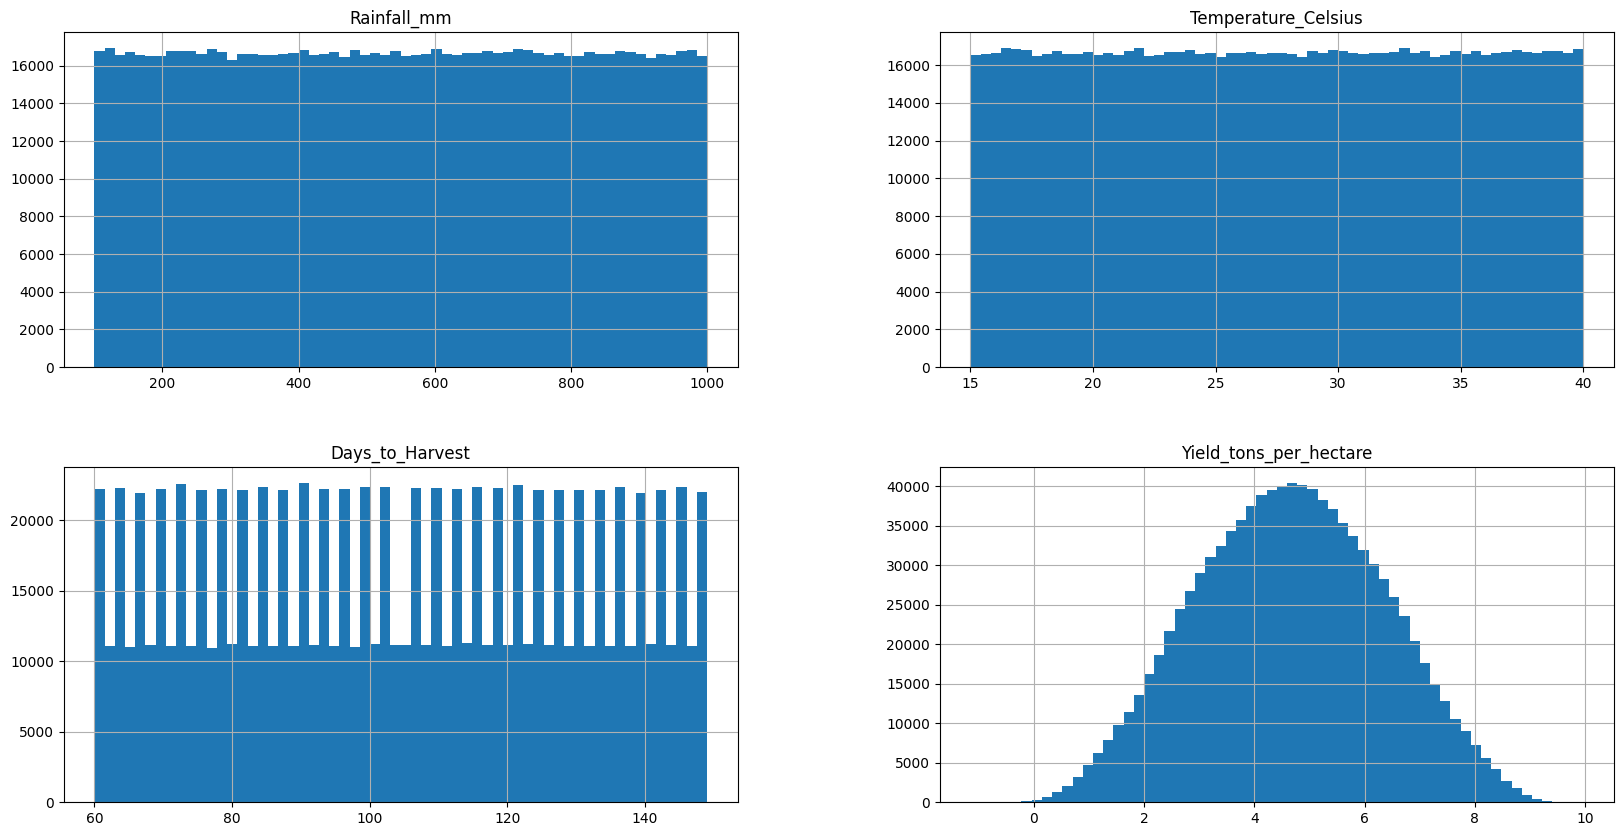

In [22]:
df.hist(bins=60, figsize =(20,10))
plt.show()

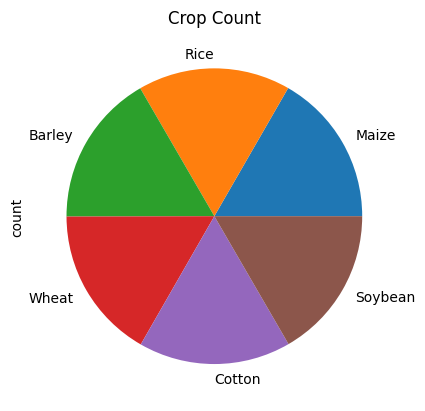

In [23]:
ax = df['Crop'].value_counts().plot(kind='pie', title='Crop Count')
plt.show()

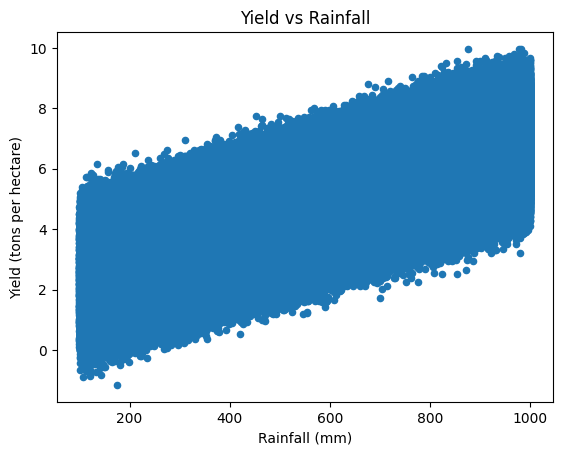

In [24]:
bx = df.plot.scatter(x='Rainfall_mm', y='Yield_tons_per_hectare', title='Yield vs Rainfall')
bx.set_xlabel('Rainfall (mm)')
bx.set_ylabel('Yield (tons per hectare)')

plt.show()

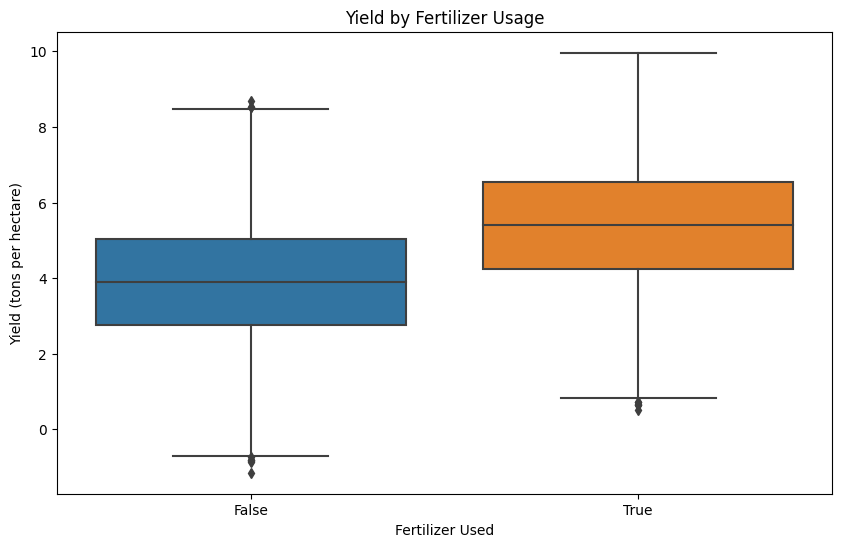

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df)
ax.set_title('Yield by Fertilizer Usage')
ax.set_xlabel('Fertilizer Used')
ax.set_ylabel('Yield (tons per hectare)')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


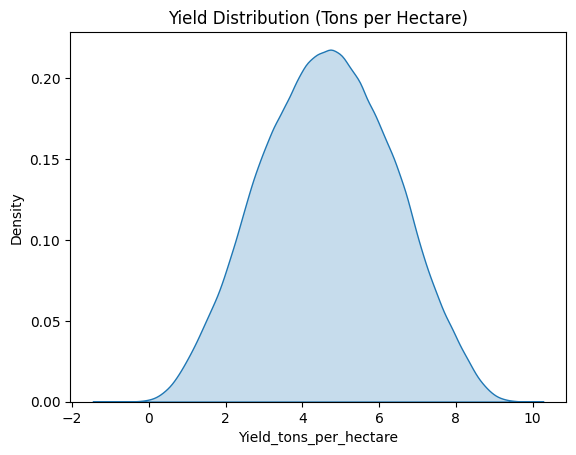

In [47]:
sns.kdeplot(df['Yield_tons_per_hectare'], fill=True)
plt.title('Yield Distribution (Tons per Hectare)')
plt.show()

## Feautre Relationship

* Scatterplot
* Pairplot
* Heatmap Correlation

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


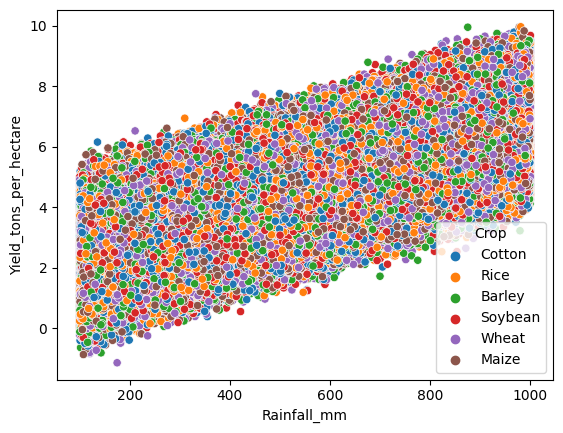

In [27]:
sns.scatterplot(x='Rainfall_mm',
                y='Yield_tons_per_hectare',
                hue = 'Crop',
                data = df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

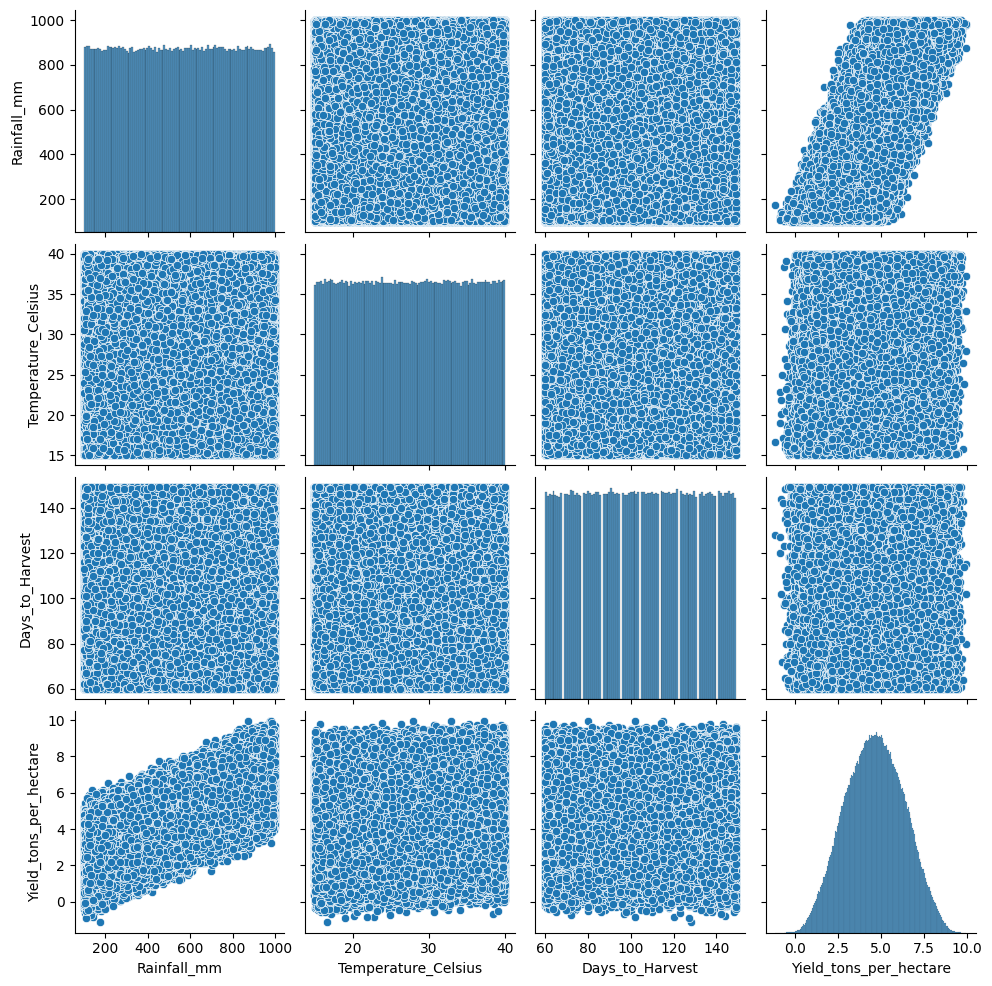

In [28]:
sns.pairplot(df,
             vars=['Rainfall_mm', 'Temperature_Celsius',
       'Days_to_Harvest', 'Yield_tons_per_hectare'])
plt.show()

In [29]:
df.corr(numeric_only=True)

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000123,-0.001076,-0.000568,-0.002669,0.764618
Temperature_Celsius,-0.000123,1.000000,0.002343,-0.000484,-0.000731,0.085565
Fertilizer_Used,-0.001076,0.002343,1.000000,0.001510,-0.001029,0.442099
Irrigation_Used,-0.000568,-0.000484,0.001510,1.000000,-0.001234,0.353741
Days_to_Harvest,-0.002669,-0.000731,-0.001029,-0.001234,1.000000,-0.002591
Yield_tons_per_hectare,0.764618,0.085565,0.442099,0.353741,-0.002591,1.000000


<Axes: >

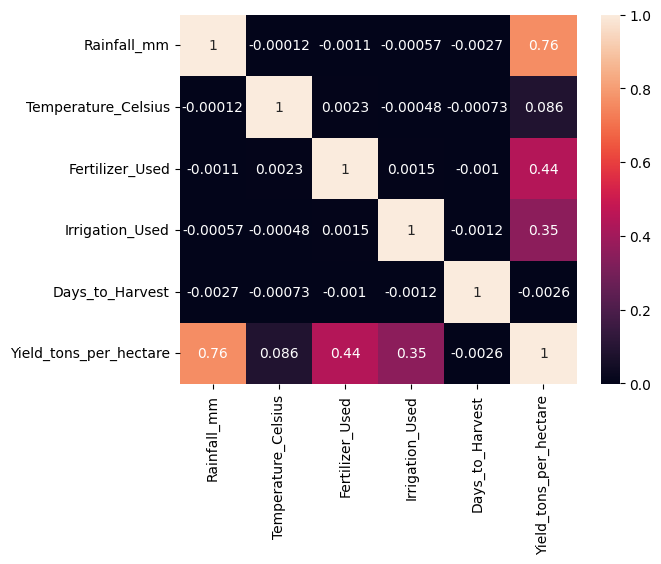

In [30]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

Correlations between numerical variables in the data set are shown in colors. Colors represent the magnitude of the correlation coefficients. Light colorscolors indicate strong correlations and darkindicate weak correlations.


# Data Preprocessing

In [31]:
df.head()

,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [33]:
X = df[['Temperature_Celsius', 'Yield_tons_per_hectare']].values

In [35]:
print(X)

[[27.67696637  6.55581626]
 [18.02614225  8.52734091]
 [29.79404242  1.12744334]
 ...
 [24.37004189  5.76318192]
 [33.04550506  2.07015871]
 [27.29884735  2.93724319]]


# Algorithm Selection & Hyperparameter Optimization

## Training the K-Means Clustering model on the dataset

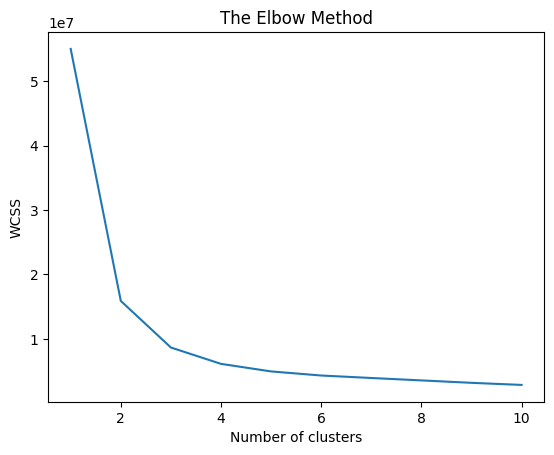

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It applies the Elbow Method to determine the appropriate number of clusters using the k-means clustering algorithm. WCSS values ​​are calculated for cluster numbers from 1 to 10. The Elbow Method chart was created with WCSS values. Looking at the graph, the most appropriate number of clusters was found to be 3.


In [39]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [40]:
print(y_kmeans)

[0 1 0 ... 0 2 0]


## Visualising the clusters

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


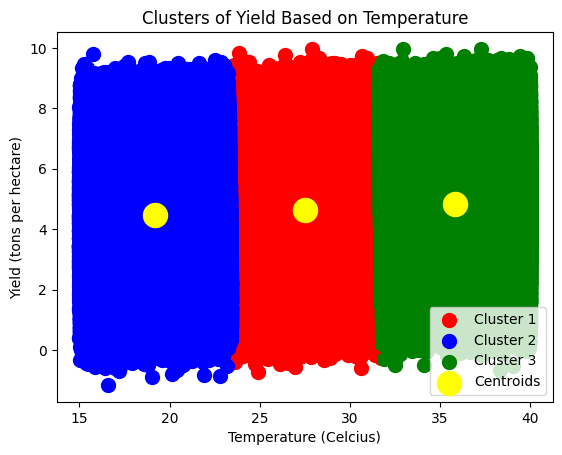

In [41]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Yield Based on Temperature')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Yield (tons per hectare)')
plt.legend()
plt.show()

Data points of 3 different clusters and the centroid of each cluster are shown.


## Dimensionality Reduction & PCA

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.94808624 0.05191376]
1.0


PCA is applied to reduce the size of the data. 

pca.explained_variance_ratio_: It shows the contribution rate of each principal component to the total variance. This helps you understand how much of the information in the data each component represents.

pca.explained_variance_ratio_: It shows how much variance the two main components explain in total.


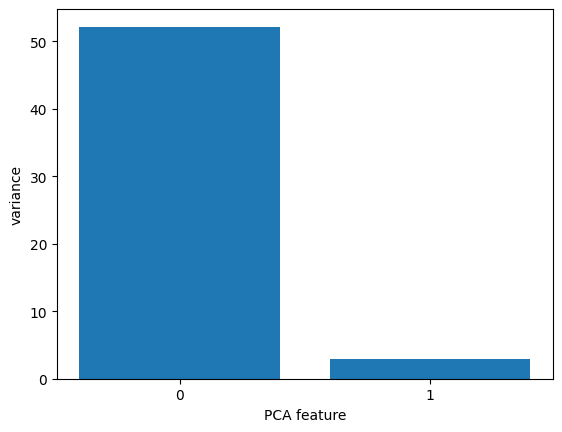

In [43]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

A bar chart was created to visualize the variances of the principal components obtained from PCA.

 features = range(pca.n_components_): A range was created with the number of main components determined in the PCA model.
 
pca.explained_variance_: represents the variance values ​​of the principal components.


# Model Evaluation

In [44]:
inertia = kmeans.inertia_
print(f'Inertia (WCSS): {inertia}')

Inertia (WCSS): 8650639.268537555
